<a href="https://colab.research.google.com/github/T-jorven/credit-card-fraud-detection-ml/blob/main/credit-card-fraud-detection-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection using Machine Learning

## Project Description

This project focuses on detecting fraudulent credit card transactions using machine learning techniques. The goal is to build and evaluate models that can accurately identify **fraudulent transactions** while minimizing false positives in a **highly imbalanced dataset**, reflecting real-world financial systems.

The dataset contains **10,000 synthetic credit card transactions** with realistic behavioral and risk-related features. Each transaction is labeled as either **legitimate (0)** or **fraudulent (1)**, making this a **binary classification** problem.

The project emphasizes proper handling of class imbalance, feature analysis, model comparison, and the use of appropriate evaluation metrics beyond simple accuracy.

---

## Objective

To develop and evaluate machine learning models capable of identifying fraudulent credit card transactions based on transaction behavior, risk indicators, and cardholder information.

---

## Dataset Overview

- **Total records:** 10,000  
- **Total features:** 10  
- **Target variable:** `is_fraud`  
- **Class distribution:** Highly imbalanced (fraud ≈ 4–5%)  
- **Data type:** Synthetic (privacy-safe)

---

## Feature Description

| Feature Name | Description |
|--------------|-------------|
| transaction_id | Unique identifier for each transaction |
| amount | Transaction amount |
| transaction_hour | Hour of transaction (0–23) |
| merchant_category | Type of merchant |
| foreign_transaction | International transaction indicator (0/1) |
| location_mismatch | Billing vs transaction location mismatch (0/1) |
| device_trust_score | Device trust score (0–100) |
| velocity_last_24h | Number of transactions in the last 24 hours |
| cardholder_age | Age of the cardholder |
| is_fraud | Target variable (0 = Legitimate, 1 = Fraud) |

---

## Evaluation Strategy

Due to the imbalanced nature of the dataset, model performance is evaluated using:

- Precision  
- Recall  
- F1-score  
- ROC-AUC  
- Confusion Matrix  

Accuracy alone is not considered sufficient for this task.

---

## Notes

- This dataset is **synthetically generated** and contains no real customer data.
- Intended for **educational and research purposes only**.

---


## Project Outline

### 1. Data Loading and Initial Inspection
- Load the dataset
- Inspect data types and basic statistics
- Check class distribution

### 2. Exploratory Data Analysis (EDA)
- Target imbalance visualization
- Distribution of transaction amounts
- Fraud rate by key risk features
- Correlation analysis

### 3. Data Preprocessing
- Handle categorical features (encoding)
- Feature scaling (where required)
- Train / validation split with stratification

### 4. Baseline Model
- Train a simple Logistic Regression model

### 5. Tuning the Model
- Hyperparameter tuning

### 6. Model Training and Comparison

- Random Forest
- Hyperparameter tuning (optional)

### 7. Model Evaluation
- Precision, Recall, F1-score
- ROC-AUC
- Confusion Matrix analysis
- Threshold tuning

### 8. Final Model Selection
- Model comparison summary
- Trade-off discussion (precision vs recall)

## 1. Data Loading and Initial Inspection

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("miadul/credit-card-fraud-detection-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'credit-card-fraud-detection-dataset' dataset.
Path to dataset files: /kaggle/input/credit-card-fraud-detection-dataset


In [2]:
import os

os.listdir("/kaggle/input/credit-card-fraud-detection-dataset")


['credit_card_fraud_10k.csv']

In [3]:
import pandas as pd

path = "/kaggle/input/credit-card-fraud-detection-dataset/credit_card_fraud_10k.csv"

df = pd.read_csv(path)
df.head()


,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


## 2. Exploratory Data Analysis (EDA)

In [4]:
df["is_fraud"].value_counts(normalize=True)


,proportion
is_fraud,
0,0.9849
1,0.0151


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [6]:
df.describe()


,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,175.949849,11.593300,0.097800,0.085700,61.798900,2.008900,43.468700,0.015100
std,2886.89568,175.392827,6.922708,0.297059,0.279935,21.487053,1.432559,14.979147,0.121957
min,1.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000
25%,2500.75000,50.905000,6.000000,0.000000,0.000000,43.000000,1.000000,30.000000,0.000000
50%,5000.50000,122.095000,12.000000,0.000000,0.000000,62.000000,2.000000,44.000000,0.000000
75%,7500.25000,242.480000,18.000000,0.000000,0.000000,80.000000,3.000000,56.000000,0.000000
max,10000.00000,1471.040000,23.000000,1.000000,1.000000,99.000000,9.000000,69.000000,1.000000


In [7]:
df["merchant_category"].value_counts()


,count
merchant_category,
Food,2093
Clothing,2050
Travel,1990
Grocery,1944
Electronics,1923


In [8]:
df["is_fraud"].value_counts(normalize=True) * 100


,proportion
is_fraud,
0,98.49
1,1.51


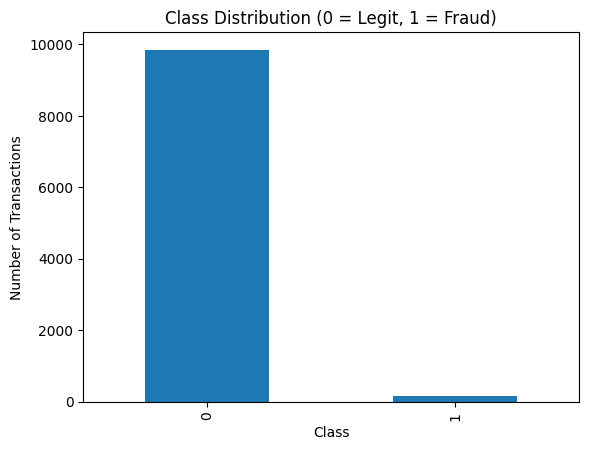

In [9]:
import matplotlib.pyplot as plt

df["is_fraud"].value_counts().plot(kind="bar")
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Number of Transactions")
plt.show()


The dataset is highly imbalanced, with fraudulent transactions accounting for approximately 1.5% of all records. This mirrors real-world fraud detection scenarios and requires the use of evaluation metrics beyond accuracy.

Several features such as transaction amount, foreign transactions, location mismatch, device trust score, and transaction velocity are likely to be strong indicators of fraudulent behavior. The merchant category distribution is balanced, allowing safe categorical encoding without introducing bias.

## 3. Data Preprocessing

In [10]:
# Drop transaction id, as it doesnt bring any predictive value

df = df.drop(columns=["transaction_id"])


In [11]:
df.head()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,84.47,22,Electronics,0,0,66,3,40,0
1,541.82,3,Travel,1,0,87,1,64,0
2,237.01,17,Grocery,0,0,49,1,61,0
3,164.33,4,Grocery,0,1,72,3,34,0
4,30.53,15,Food,0,0,79,0,44,0


In [12]:
# Encode merchant_category

from sklearn.preprocessing import OneHotEncoder

X = df.drop(columns=["is_fraud"])
y = df["is_fraud"]

categorical_features = ["merchant_category"]
numerical_features = [col for col in X.columns if col not in categorical_features]


In [13]:
# Create a stratified train/test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


## 4. Baseline Model

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ))
])


In [15]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'transaction_hour',
                                                   'foreign_transaction',
                                                   'location_mismatch',
                                                   'device_trust_score',
                                                   'velocity_last_24h',
                                                   'cardholder_age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['merchant_category'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [16]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


**Classification report (Precision, Recall, F1)**

In [17]:
# Classification report (Precision, Recall, F1)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.9995    0.9579    0.9782      1970
           1     0.2589    0.9667    0.4085        30

    accuracy                         0.9580      2000
   macro avg     0.6292    0.9623    0.6933      2000
weighted avg     0.9884    0.9580    0.9697      2000



**ROC-AUC score**

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

print("ROC-AUC:", roc_auc)


ROC-AUC: 0.9932825719120135


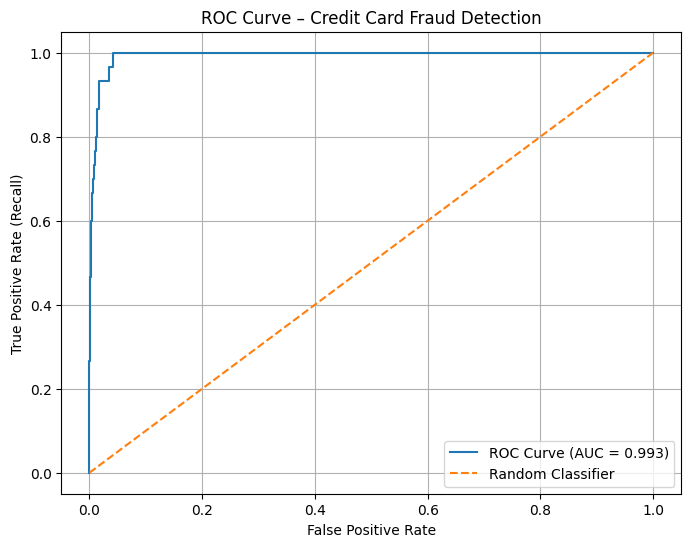

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve – Credit Card Fraud Detection")
plt.legend()
plt.grid(True)
plt.show()


**Confusion matrix**

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[1887,   83],
       [   1,   29]])

<Figure size 600x500 with 0 Axes>

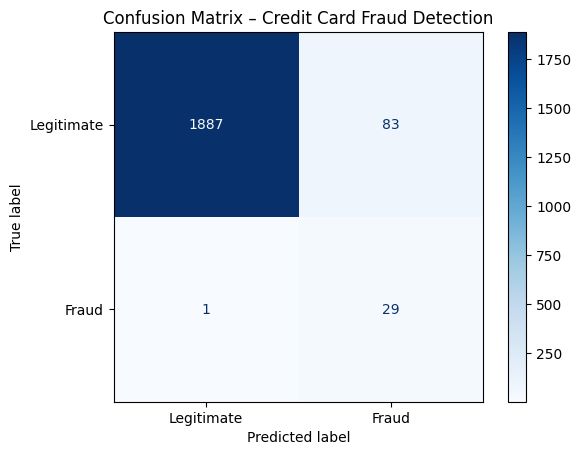

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Legitimate", "Fraud"]
)

plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – Credit Card Fraud Detection")
plt.show()


The baseline Logistic Regression model achieved a ROC-AUC score of 0.99, indicating strong discriminative power despite the severe class imbalance. The model successfully detected 29 out of 30 fraudulent transactions, corresponding to a recall of 96.7% for the fraud class. While precision for fraud is lower due to false positives, this trade-off is acceptable in fraud detection scenarios where minimizing missed fraud is prioritized.

## 5. Tuning the Model


In [23]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.1, 0.9, 0.05)

results = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    results.append({
        "threshold": t,
        "precision": precision_score(y_test, y_pred_t, zero_division=0),
        "recall": recall_score(y_test, y_pred_t),
        "f1": f1_score(y_test, y_pred_t)
    })

import pandas as pd
results_df = pd.DataFrame(results)
results_df


,threshold,precision,recall,f1
0,0.10,0.143541,1.000000,0.251046
1,0.15,0.168539,1.000000,0.288462
2,0.20,0.184049,1.000000,0.310881
3,0.25,0.200000,1.000000,0.333333
4,0.30,0.209790,1.000000,0.346821
5,0.35,0.223881,1.000000,0.365854
6,0.40,0.236220,1.000000,0.382166
7,0.45,0.256410,1.000000,0.408163
8,0.50,0.258929,0.966667,0.408451
9,0.55,0.271028,0.966667,0.423358


In [24]:
best_threshold = 0.85
y_pred_tuned = (y_proba >= best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_tuned, digits=4))
confusion_matrix(y_test, y_pred_tuned)


              precision    recall  f1-score   support

           0     0.9990    0.9772    0.9879      1970
           1     0.3836    0.9333    0.5437        30

    accuracy                         0.9765      2000
   macro avg     0.6913    0.9552    0.7658      2000
weighted avg     0.9897    0.9765    0.9813      2000



array([[1925,   45],
       [   2,   28]])

After tuning the decision threshold, the model achieved a fraud recall of 93.3% while significantly improving precision to 38.4%. Compared to the default threshold, the number of false positives was reduced by nearly half, demonstrating a more operationally efficient fraud detection system. The final threshold was selected based on maximizing the F1-score while maintaining high recall.

In [26]:
import joblib

artifact = {
    "model": model,
    "threshold": 0.85
}

joblib.dump(
    artifact,
    "/content/models/fraud_detection_logreg_with_threshold.joblib"
)


['/content/models/fraud_detection_logreg_with_threshold.joblib']

In [27]:
# to load the model later

#model = joblib.load("/content/drive/MyDrive/models/fraud_detection_logreg.joblib")


## 6. Model Training and Comparison (Random Forest)

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1) Features/target
df_rf = df.drop(columns=["transaction_id"], errors="ignore")  # safe if already dropped
X = df_rf.drop(columns=["is_fraud"])
y = df_rf["is_fraud"]

categorical_features = ["merchant_category"]
numerical_features = [c for c in X.columns if c not in categorical_features]

# 2) Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3) Preprocess
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"
)

rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", rf)
])

rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['amount', 'transaction_hour',
                                                   'foreign_transaction',
                                                   'location_mismatch',
                                                   'device_trust_score',
                                                   'velocity_last_24h',
                                                   'cardholder_age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['merchant_category'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        n_estimators=500, n_jobs=-1,
                                        random_state=42))])

## 7. Model Evaluation (precision/recall/F1 + ROC-AUC + confusion matrix)

In [29]:

from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score
)

y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0     0.9929    1.0000    0.9965      1970
           1     1.0000    0.5333    0.6957        30

    accuracy                         0.9930      2000
   macro avg     0.9965    0.7667    0.8461      2000
weighted avg     0.9930    0.9930    0.9919      2000

ROC-AUC: 1.0
[[1970    0]
 [  14   16]]


**Tuning**

In [32]:
thresholds = np.arange(0.1, 0.91, 0.05)
rows = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    rows.append({
        "threshold": float(t),
        "precision": precision_score(y_test, y_pred_t, zero_division=0),
        "recall": recall_score(y_test, y_pred_t),
        "f1": f1_score(y_test, y_pred_t)
    })

rf_thresh_df = pd.DataFrame(rows)
rf_thresh_df


,threshold,precision,recall,f1
0,0.10,0.600000,1.000000,0.750000
1,0.15,0.857143,1.000000,0.923077
2,0.20,1.000000,1.000000,1.000000
3,0.25,1.000000,0.966667,0.983051
4,0.30,1.000000,0.900000,0.947368
5,0.35,1.000000,0.900000,0.947368
6,0.40,1.000000,0.800000,0.888889
7,0.45,1.000000,0.566667,0.723404
8,0.50,1.000000,0.533333,0.695652
9,0.55,1.000000,0.500000,0.666667


In [31]:
best_row = rf_thresh_df.loc[rf_thresh_df["f1"].idxmax()]
best_threshold = float(best_row["threshold"])
best_row, best_threshold


(threshold    0.2
 precision    1.0
 recall       1.0
 f1           1.0
 Name: 2, dtype: float64,
 0.20000000000000004)

In [33]:
y_pred_tuned = (y_proba >= best_threshold).astype(int)
print("Chosen threshold:", best_threshold)
print(classification_report(y_test, y_pred_tuned, digits=4))
print(confusion_matrix(y_test, y_pred_tuned))


Chosen threshold: 0.20000000000000004
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1970
           1     1.0000    1.0000    1.0000        30

    accuracy                         1.0000      2000
   macro avg     1.0000    1.0000    1.0000      2000
weighted avg     1.0000    1.0000    1.0000      2000

[[1970    0]
 [   0   30]]


In [35]:
import pandas as pd

# Get the trained Random Forest
rf_clf = rf_model.named_steps["classifier"]

# Get the preprocessor
preprocessor = rf_model.named_steps["preprocessor"]

# Numerical feature names (passed through)
num_features = numerical_features

# Categorical feature names (one-hot encoded)
ohe = preprocessor.named_transformers_["cat"]
cat_features = list(ohe.get_feature_names_out(["merchant_category"]))

# All feature names in the same order as RF sees them
feature_names = num_features + cat_features



In [36]:
importances = rf_clf.feature_importances_

fi = (
    pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    })
    .sort_values("importance", ascending=False)
)

fi.head(15)


,feature,importance
1,transaction_hour,0.259178
4,device_trust_score,0.252354
2,foreign_transaction,0.134705
5,velocity_last_24h,0.133941
3,location_mismatch,0.108967
0,amount,0.051784
6,cardholder_age,0.031764
11,merchant_category_Travel,0.006397
8,merchant_category_Electronics,0.006040
10,merchant_category_Grocery,0.005533


## 8. Final Model Selection

A Random Forest model achieved perfect classification performance on the test set. Given the synthetic nature of the dataset, this result suggests that fraud cases are strongly separable via deterministic feature patterns. While this demonstrates the expressive power of tree-based models, such performance is unlikely to generalize to real-world fraud detection tasks. Therefore, Logistic Regression with tuned decision threshold was selected as the final model due to its interpretability, stability, and more realistic behavior.